# Basic clustering
## importing libraries

In [1]:
%matplotlib inline
import numpy as np
from fcmeans import FCM
from matplotlib import pyplot as plt

## creating artificial data set

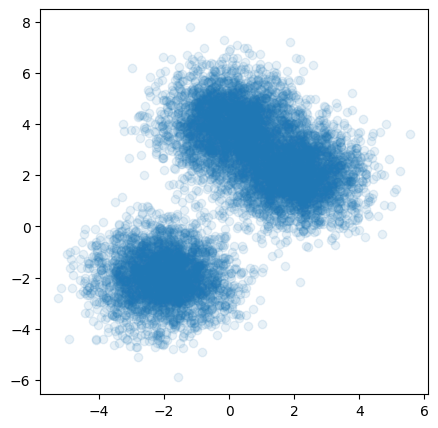

In [2]:
n_samples = 3000

X = np.concatenate((
    np.random.normal((-2, -2), size=(n_samples, 2)),
    np.random.normal((2, 2), size=(n_samples, 2)),
    np.random.normal((0, 4), size=(n_samples, 2))
))

plt.figure(figsize=(5, 5))
plt.scatter(X[:,0], X[:,1], alpha=.1)
plt.show()

# fitting the fuzzy-c-means using several types of distance

In [3]:
fcm_cosine = FCM(n_clusters=3, distance='cosine', random_state=42)
fcm_minkowski = FCM(n_clusters=3, distance='minkowski', distance_params={'p': 1}, random_state=42)
fcm_euclidean = FCM(n_clusters=3)

fcm_cosine.fit(X)
fcm_minkowski.fit(X)
fcm_euclidean.fit(X)

# showing results

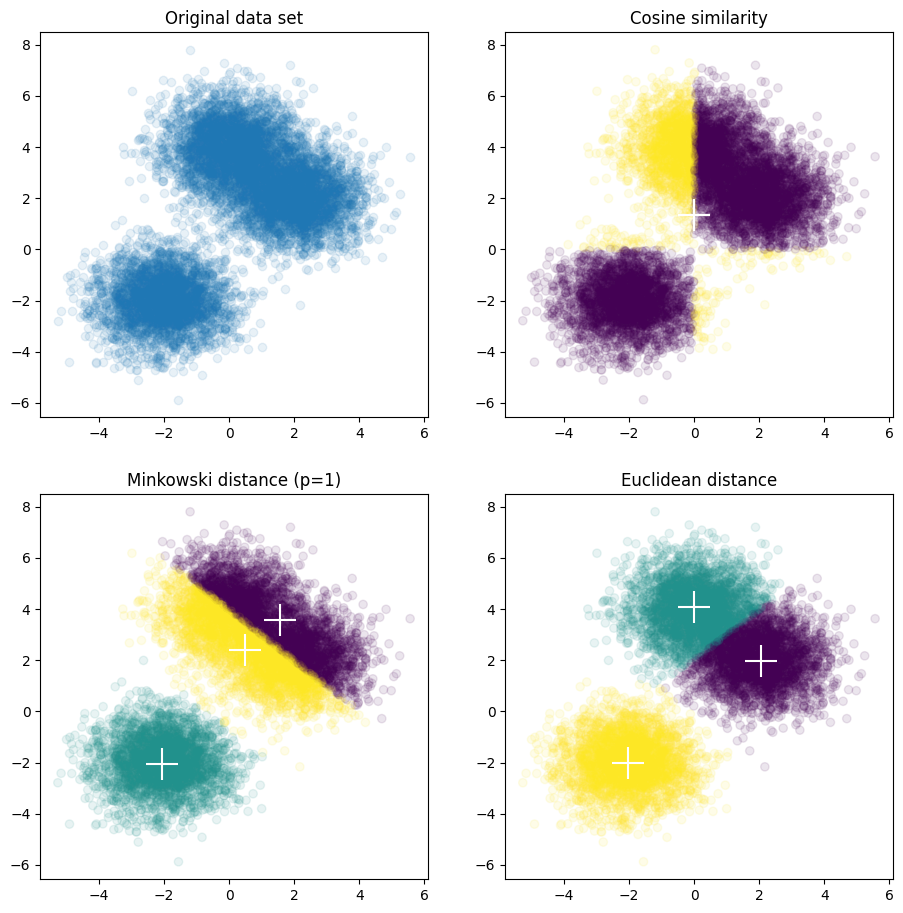

In [4]:
# plot result
f, axes = plt.subplots(2, 2, figsize=(11,11))
axes[0, 0].scatter(X[:,0], X[:,1], alpha=.1)
axes[0, 0].set_title("Original data set")

# cosine
fcm_cosine_centers = fcm_cosine.centers
fcm_cosine_labels = fcm_cosine.predict(X)
axes[0, 1].scatter(X[:,0], X[:,1], c=fcm_cosine_labels, alpha=.1)
axes[0, 1].scatter(fcm_cosine_centers[:,0], fcm_cosine_centers[:,1], marker="+", s=500, c='w')
axes[0, 1].set_title("Cosine similarity")

# minkowski
fcm_minkowski_centers = fcm_minkowski.centers
fcm_minkowski_labels = fcm_minkowski.predict(X)
axes[1, 0].scatter(X[:,0], X[:,1], c=fcm_minkowski_labels, alpha=.1)
axes[1, 0].scatter(fcm_minkowski_centers[:,0], fcm_minkowski_centers[:,1], marker="+", s=500, c='w')
axes[1, 0].set_title("Minkowski distance (p=1)")

# euclidean
fcm_euclidean_centers = fcm_euclidean.centers
fcm_euclidean_labels = fcm_euclidean.predict(X)
axes[1, 1].scatter(X[:,0], X[:,1], c=fcm_euclidean_labels, alpha=.1)
axes[1, 1].scatter(fcm_euclidean_centers[:,0], fcm_euclidean_centers[:,1], marker="+", s=500, c='w')
axes[1, 1].set_title("Euclidean distance")

plt.savefig('images/distances.jpg')
plt.show()